# Для начала подключим зависимости и загрузим обучающие и тестовые данные:

In [700]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [701]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# Начнем анализ

## Сначала тренировочный датасет:

In [702]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [703]:
train.shape # размер таблицы тренировочных данных

(8693, 14)

In [704]:
train.describe() 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [705]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [706]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [707]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Теперь перейдем к тестовому датасету:

In [708]:
test.shape # размер тестовых данных

(4277, 13)

In [709]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [710]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## После получания всей необходимой информации по типу и заполненности полей таблицы перейдем к исследованию зависимости телепортации от признаков:

In [711]:
transported = train[train['Transported'] == True]
not_transported = train[train['Transported'] == False]

print(f"Transported: {len(transported)} ({(len(transported) / len(train) * 100):0.1f} %)")
print(f"Not transported: {len(not_transported)} ({(len(not_transported) / len(train) * 100):0.1f} %)")
print(f"Total: {len(train)}")

Transported: 4378 (50.4 %)
Not transported: 4315 (49.6 %)
Total: 8693


### HomePlanet vs Transported

In [712]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [713]:
train.groupby('HomePlanet').Transported.value_counts()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: Transported, dtype: int64

In [714]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet', as_index = False).mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


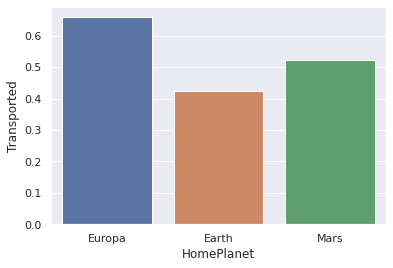

In [715]:
sns.barplot(x='HomePlanet', y='Transported', data=train, ci=None)

Из нашего исследования мы видим, что больше подвержены телепортации в другое измерение люди с Europa и Mars - и там, и там больше половины

### CryoSleep vs Transported

In [716]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [717]:
train.groupby('CryoSleep').Transported.value_counts()

CryoSleep  Transported
False      False          3650
           True           1789
True       True           2483
           False           554
Name: Transported, dtype: int64

In [718]:
train[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean()

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


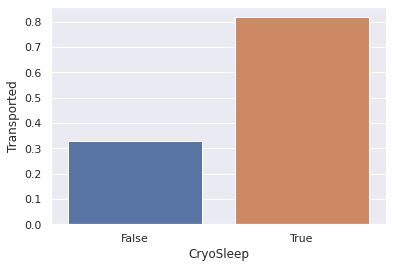

In [719]:
sns.barplot(x='CryoSleep', y='Transported', data=train, ci=None)

Отсюда можем сделать вывод, что почти все люди, лежавшие в криосне, были перенесены в другое измерение

### Destination vs Transported

In [720]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [721]:
train.groupby('Destination').Transported.value_counts()

Destination    Transported
55 Cancri e    True           1098
               False           702
PSO J318.5-22  True            401
               False           395
TRAPPIST-1e    False          3128
               True           2787
Name: Transported, dtype: int64

### Destination & CryoSleep vs Transported

In [722]:
tab = pd.crosstab(train['CryoSleep'], train['Destination'])
print (tab)

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
CryoSleep                                           
False               1017            394         3898
True                 739            383         1867


Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
CryoSleep                                           
False               1017            394         3898
True                 739            383         1867


Text(0, 0.5, 'Percentage')

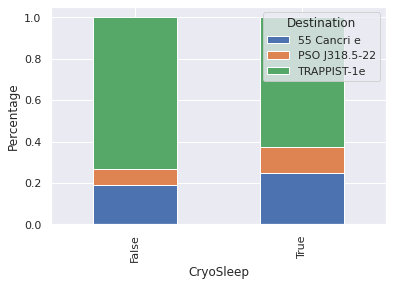

In [723]:
tab = pd.crosstab(train['CryoSleep'], train['Destination'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CryoSleep')
plt.ylabel('Percentage')

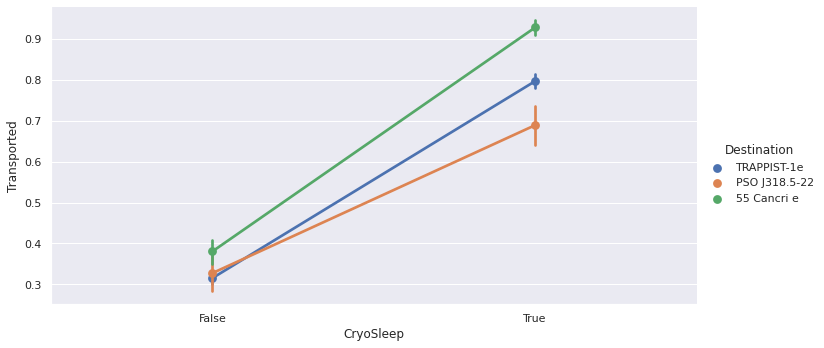

In [724]:
sns.catplot(x='CryoSleep', y='Transported', hue='Destination', aspect=2, data=train, kind='point')

Видим прямую зависимость

### VIP vs Transported

In [725]:
train.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [726]:
train.groupby('VIP').Transported.value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: Transported, dtype: int64

### Age vs Transported

In [727]:
train.Age.value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [728]:
train.groupby('Age').Transported.value_counts()

Age   Transported
0.0   True           144
      False           34
1.0   True            49
      False           18
2.0   True            53
                    ... 
77.0  False            1
      True             1
78.0  False            2
      True             1
79.0  False            3
Name: Transported, Length: 159, dtype: int64

In [729]:
train[['Age', 'Transported']].groupby('Age', as_index = False).mean()

,Age,Transported
0,0.0,0.808989
1,1.0,0.731343
2,2.0,0.706667
3,3.0,0.786667
4,4.0,0.746479
...,...,...
75,75.0,0.500000
76,76.0,0.500000
77,77.0,0.500000
78,78.0,0.333333


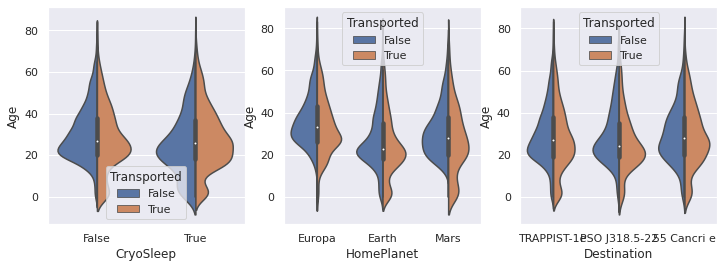

In [730]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


sns.violinplot(x="CryoSleep", y="Age", hue="Transported", data=train, split=True, ax=ax1)
sns.violinplot(x="HomePlanet", y="Age", hue="Transported", data=train, split=True, ax=ax2)
sns.violinplot(x="Destination", y="Age", hue="Transported", data=train, split=True, ax=ax3)

## Корреляция признаков:

In [731]:
corr_matrix = train.corr()
corr_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


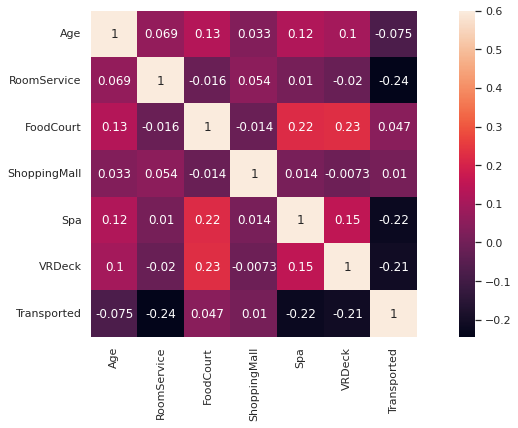

In [732]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

## Выделение признаков:

In [733]:
train_test_data = [train, test]

In [734]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [735]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [736]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [737]:
train.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [738]:
for dataset in train_test_data: # Заменяем null значения в следующих столбцах
  dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Earth')
  dataset['CryoSleep'] = dataset['CryoSleep'].fillna(False)
  dataset['Destination'] = dataset['Destination'].fillna('TRAPPIST-1e')
  dataset['VIP'] = dataset['VIP'].fillna(False)
  dataset['RoomService'] = dataset['RoomService'].fillna(dataset['RoomService'].mean())
  dataset['FoodCourt'] = dataset['FoodCourt'].fillna(dataset['FoodCourt'].mean())
  dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].mean())
  dataset['Spa'] = dataset['Spa'].fillna(dataset['Spa'].mean())
  dataset['VRDeck'] = dataset['VRDeck'].fillna(dataset['VRDeck'].mean())

In [739]:
for dataset in train_test_data: # Заполняем отсутствующие значения возраста случайными числа из промежутка
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5) # Делим людей на группы в зависимости от возраста, чтобы впоследствии сделать mapping

print(train[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean())

          AgeBand  Transported
0  (-0.079, 15.8]     0.649402
1    (15.8, 31.6]     0.474952
2    (31.6, 47.4]     0.484483
3    (47.4, 63.2]     0.486747
4    (63.2, 79.0]     0.463235


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [740]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 15.8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15.8) & (dataset['Age'] <= 31.6), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31.6) & (dataset['Age'] <= 47.4), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47.4) & (dataset['Age'] <= 63.2), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 63.2, 'Age'] = 4
    
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeBand
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"(31.6, 47.4]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"(15.8, 31.6]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"(47.4, 63.2]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"(31.6, 47.4]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,1,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"(15.8, 31.6]"


In [741]:
train.groupby('Age').Transported.value_counts()

Age  Transported
0    True            815
     False           440
1    False          2180
     True           1972
2    False          1196
     True           1124
3    False           426
     True            404
4    False            73
     True             63
Name: Transported, dtype: int64

In [742]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
AgeBand           0
dtype: int64

In [743]:
for dataset in train_test_data: # Добавляю новый столбец, который будет показывать суммарные расходы пассажиров за поездку, делю на группы и делаю mapping, как до этого делал с возрастом
  dataset['Expenses'] = dataset['RoomService'] + dataset['FoodCourt'] + dataset['ShoppingMall'] + dataset['Spa'] + dataset['VRDeck']

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeBand,Expenses
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"(31.6, 47.4]",0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"(15.8, 31.6]",736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"(47.4, 63.2]",10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"(31.6, 47.4]",5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,1,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"(15.8, 31.6]",1091.0


In [744]:
train['ExpensesBand'] = pd.cut(train['Expenses'], 4)
print(train[['ExpensesBand', 'Transported']].groupby(['ExpensesBand'], as_index=False).mean())

          ExpensesBand  Transported
0   (-35.987, 8996.75]     0.509164
1   (8996.75, 17993.5]     0.312169
2  (17993.5, 26990.25]     0.250000
3  (26990.25, 35987.0]     0.363636


In [745]:
for dataset in train_test_data:
    dataset.loc[ dataset['Expenses'] <= 8996.75, 'Expenses'] = 0
    dataset.loc[(dataset['Expenses'] > 8996.75) & (dataset['Expenses'] <= 17993.5), 'Expenses'] = 1
    dataset.loc[(dataset['Expenses'] > 17993.5) & (dataset['Expenses'] <= 26990.25), 'Expenses']   = 2
    dataset.loc[ dataset['Expenses'] > 26990.25, 'Expenses'] = 3
    dataset['Expenses'] = dataset['Expenses'].astype(int)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeBand,Expenses,ExpensesBand
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"(31.6, 47.4]",0,"(-35.987, 8996.75]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"(15.8, 31.6]",0,"(-35.987, 8996.75]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"(47.4, 63.2]",1,"(8996.75, 17993.5]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"(31.6, 47.4]",0,"(-35.987, 8996.75]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,1,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"(15.8, 31.6]",0,"(-35.987, 8996.75]"


In [746]:
for dataset in train_test_data: # Преобразую столбцы с boolean значениями: true: 1, false: 0
  dataset['CryoSleep'] = dataset['CryoSleep'] * 1
  dataset['VIP'] = dataset['VIP'] * 1

train['Transported'] = train['Transported'] * 1
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeBand,Expenses,ExpensesBand
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,"(31.6, 47.4]",0,"(-35.987, 8996.75]"
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,"(15.8, 31.6]",0,"(-35.987, 8996.75]"
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,"(47.4, 63.2]",1,"(8996.75, 17993.5]"
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,"(31.6, 47.4]",0,"(-35.987, 8996.75]"
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,"(15.8, 31.6]",0,"(-35.987, 8996.75]"


In [747]:
for dataset in train_test_data: # Делаю mapping по планетам и пунктам назначения (цифры соответствия указаны ниже)
    dataset['HomePlanet'] = dataset['HomePlanet'].map( {'Earth': 0, 'Europa': 1, 'Mars': 2} ).astype(int)
    dataset['Destination'] = dataset['Destination'].map( {'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2} ).astype(int)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeBand,Expenses,ExpensesBand
0,0001_01,1,0,B/0/P,0,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,"(31.6, 47.4]",0,"(-35.987, 8996.75]"
1,0002_01,0,0,F/0/S,0,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,"(15.8, 31.6]",0,"(-35.987, 8996.75]"
2,0003_01,1,0,A/0/S,0,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,"(47.4, 63.2]",1,"(8996.75, 17993.5]"
3,0003_02,1,0,A/0/S,0,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,"(31.6, 47.4]",0,"(-35.987, 8996.75]"
4,0004_01,0,0,F/1/S,0,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,"(15.8, 31.6]",0,"(-35.987, 8996.75]"


## Отбор признаков:

In [748]:
features_drop = ['Cabin', 'Name']
train = train_test_data[0].drop(features_drop, axis=1)
test = train_test_data[1].drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,AgeBand,Expenses,ExpensesBand
0,1,0,0,2,0,0.0,0.0,0.0,0.0,0.0,0,"(31.6, 47.4]",0,"(-35.987, 8996.75]"
1,0,0,0,1,0,109.0,9.0,25.0,549.0,44.0,1,"(15.8, 31.6]",0,"(-35.987, 8996.75]"
2,1,0,0,3,1,43.0,3576.0,0.0,6715.0,49.0,0,"(47.4, 63.2]",1,"(8996.75, 17993.5]"
3,1,0,0,2,0,0.0,1283.0,371.0,3329.0,193.0,0,"(31.6, 47.4]",0,"(-35.987, 8996.75]"
4,0,0,0,1,0,303.0,70.0,151.0,565.0,2.0,1,"(15.8, 31.6]",0,"(-35.987, 8996.75]"


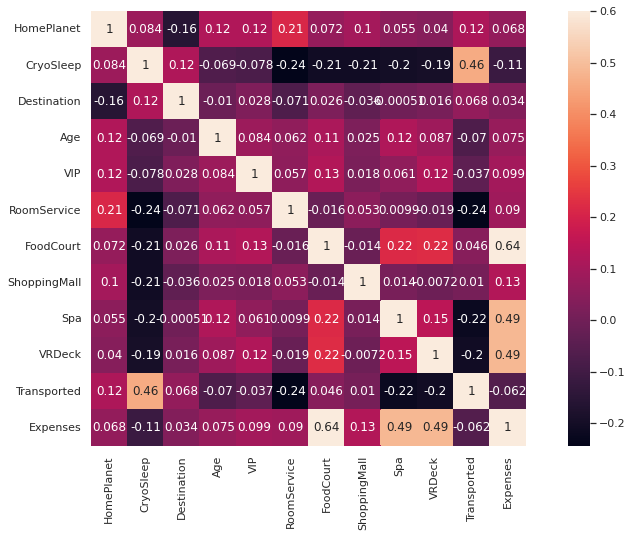

In [749]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

Из результатов работы последних двух блоков кода мы видим итоговый вид тренировочной таблицы и итоговую матрицу корреляции.
Исследование завершено ;)

# Моделирование

## Модели:

Модель - случайный лес(Random forest)

In [750]:
from sklearn.ensemble import RandomForestClassifier

In [751]:
X_train = train.drop(['Transported', 'AgeBand', 'ExpensesBand'], axis=1)
y_train = train['Transported']

X_test = test.drop("PassengerId", axis=1).copy()

test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenses
0,0013_01,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0
1,0018_01,0,0,0,1,0,0.0,9.0,0.0,2823.0,0.0,0
2,0019_01,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0
3,0021_01,1,0,0,2,0,0.0,6652.0,0.0,181.0,585.0,0
4,0023_01,0,0,0,1,0,10.0,0.0,635.0,0.0,0.0,0


In [752]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

91.72


Модель - перцептрон(perceptron)

In [753]:
from sklearn.linear_model import Perceptron

In [754]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print(acc_perceptron)

75.45


Модель - Gaussian Naive Bayes

In [755]:
from sklearn.naive_bayes import GaussianNB

In [756]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print(acc_gnb)

67.86


Модель - Стохастический градиентный спуск (SGD)

In [757]:
from sklearn.linear_model import SGDClassifier

In [758]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print(acc_sgd)

76.94


Модель - Support Vector Machine (SVM)

In [759]:
from sklearn.svm import SVC, LinearSVC

In [760]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print(acc_svc)

79.03


Модель - Решающие деревья (или дерево решений, decision tree)

In [761]:
from sklearn.tree import DecisionTreeClassifier

In [762]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

91.72


На данной выборке лучше всего себя показали модели решающие деревья и случайный лес с точностью свыше 91%.

## Confusion matrix

Accuracy: 91 % 



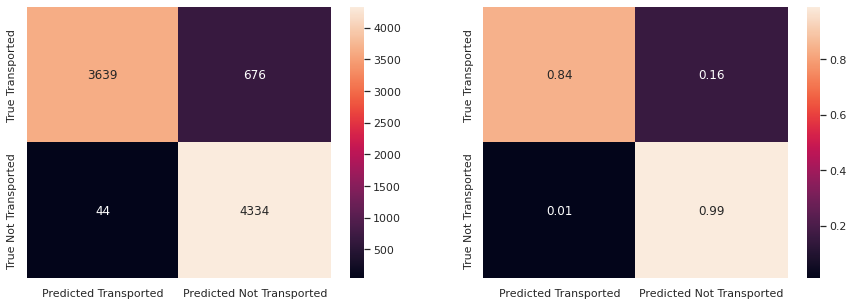

In [763]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Transported', 'Not Transported']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Transported', 'True Not Transported']
predicted_class_names = ['Predicted Transported', 'Predicted Not Transported']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

# Создание файла для отправки на Kaggle

In [764]:
sub = pd.read_csv('/content/sample_submission.csv')
sub['Transported'] = y_pred_random_forest
sub['Transported'] = sub['Transported'].map(lambda x:True if x>=0.5 else False)
sub.to_csv('submission.csv',index=False)